In [1]:
import synthx as sx

### sensitivity check

In [2]:
df = sx.sample(
    n_units=200,
    n_time=50,
    n_observed_covariates=2,
    n_unobserved_covariates=1,
    intervention_units=[1, 2, 3],
    intervention_time=40,
    intervention_effect=1,
    noise_effect=0.1,
    scale=2,
    seed=42,
)

In [3]:
dataset = sx.Dataset(
    df,
    unit_column = 'unit',
    time_column = 'time',
    y_column = 'y',
    covariate_columns=['covariate_1', 'covariate_2'],
    intervention_units=[1, 2, 3],
    intervention_time=40,
)

In [4]:
effects_test, effects_placebo, sc_test, scs_placebo = sx.placebo_test(dataset)

100%|█████████████████████████████████████████| 197/197 [00:10<00:00, 18.82it/s]


In [5]:
sx.stats.calc_p_value(effects_test, effects_placebo)

0.024332328861074715

uplift: 1.0125, p value: 0.6969712533438388.
2it [00:02,  1.83it/s, uplift=1.0125]

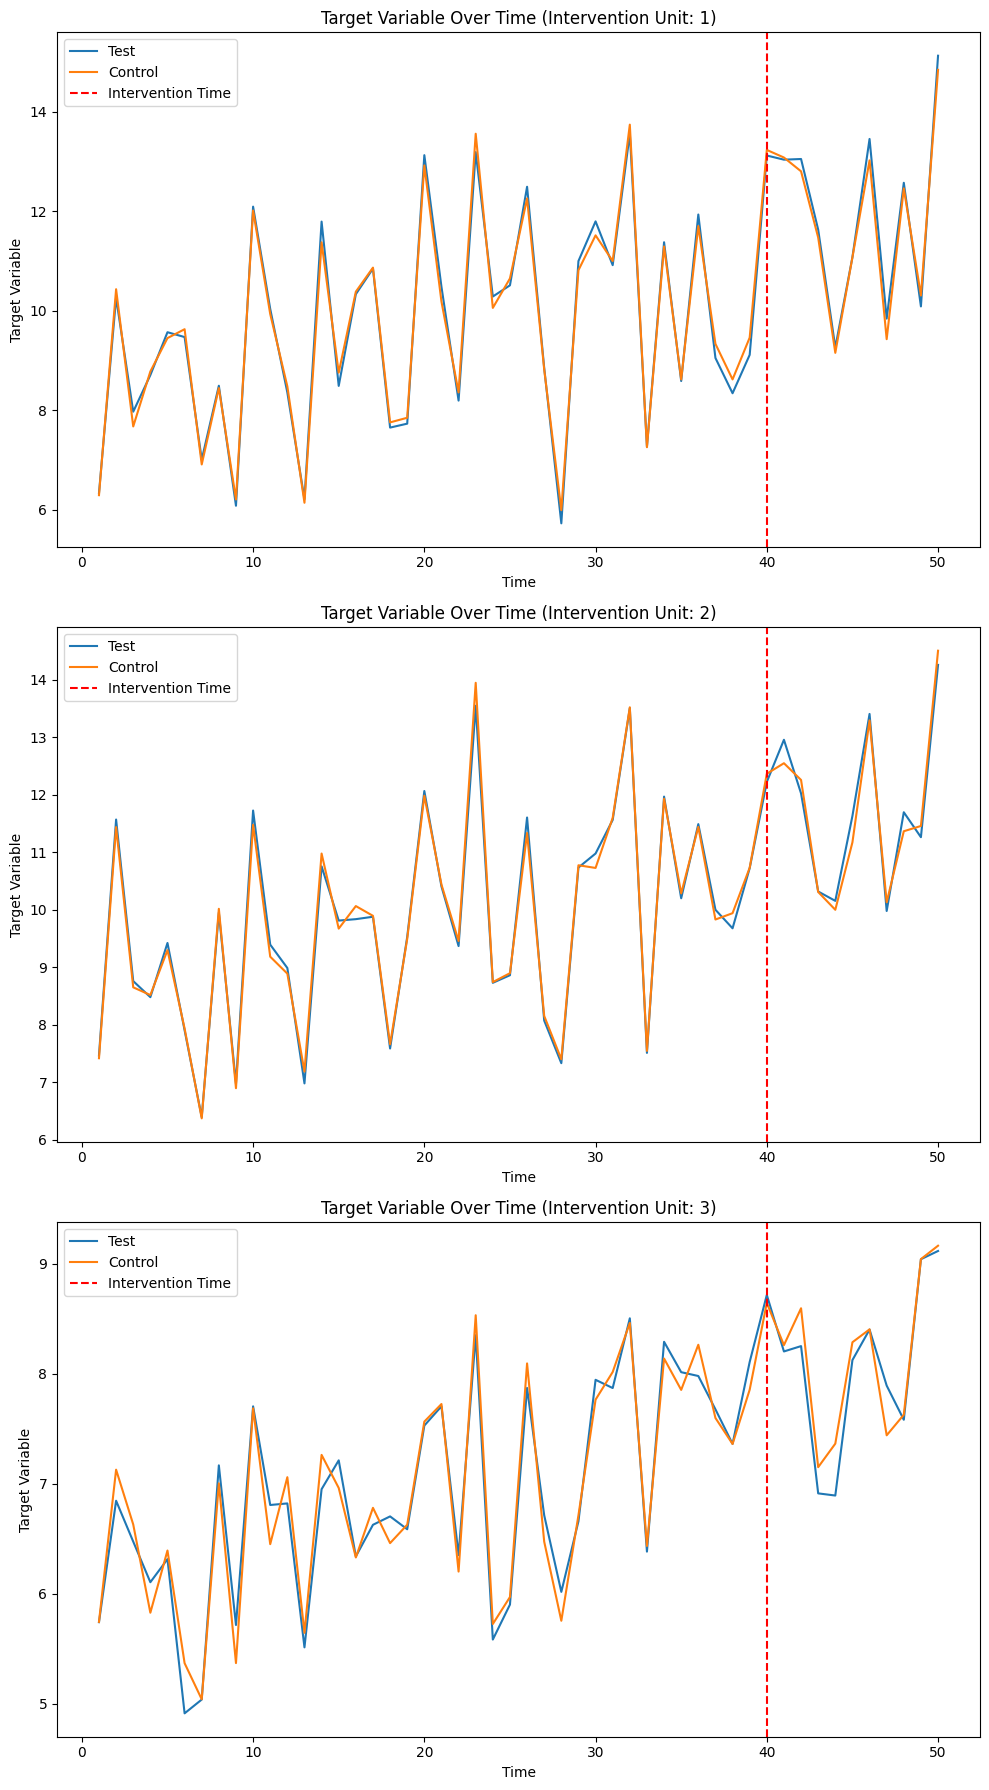

uplift: 1.0187, p value: 0.08730761577992817.
3it [00:03,  1.08it/s, uplift=1.0187]

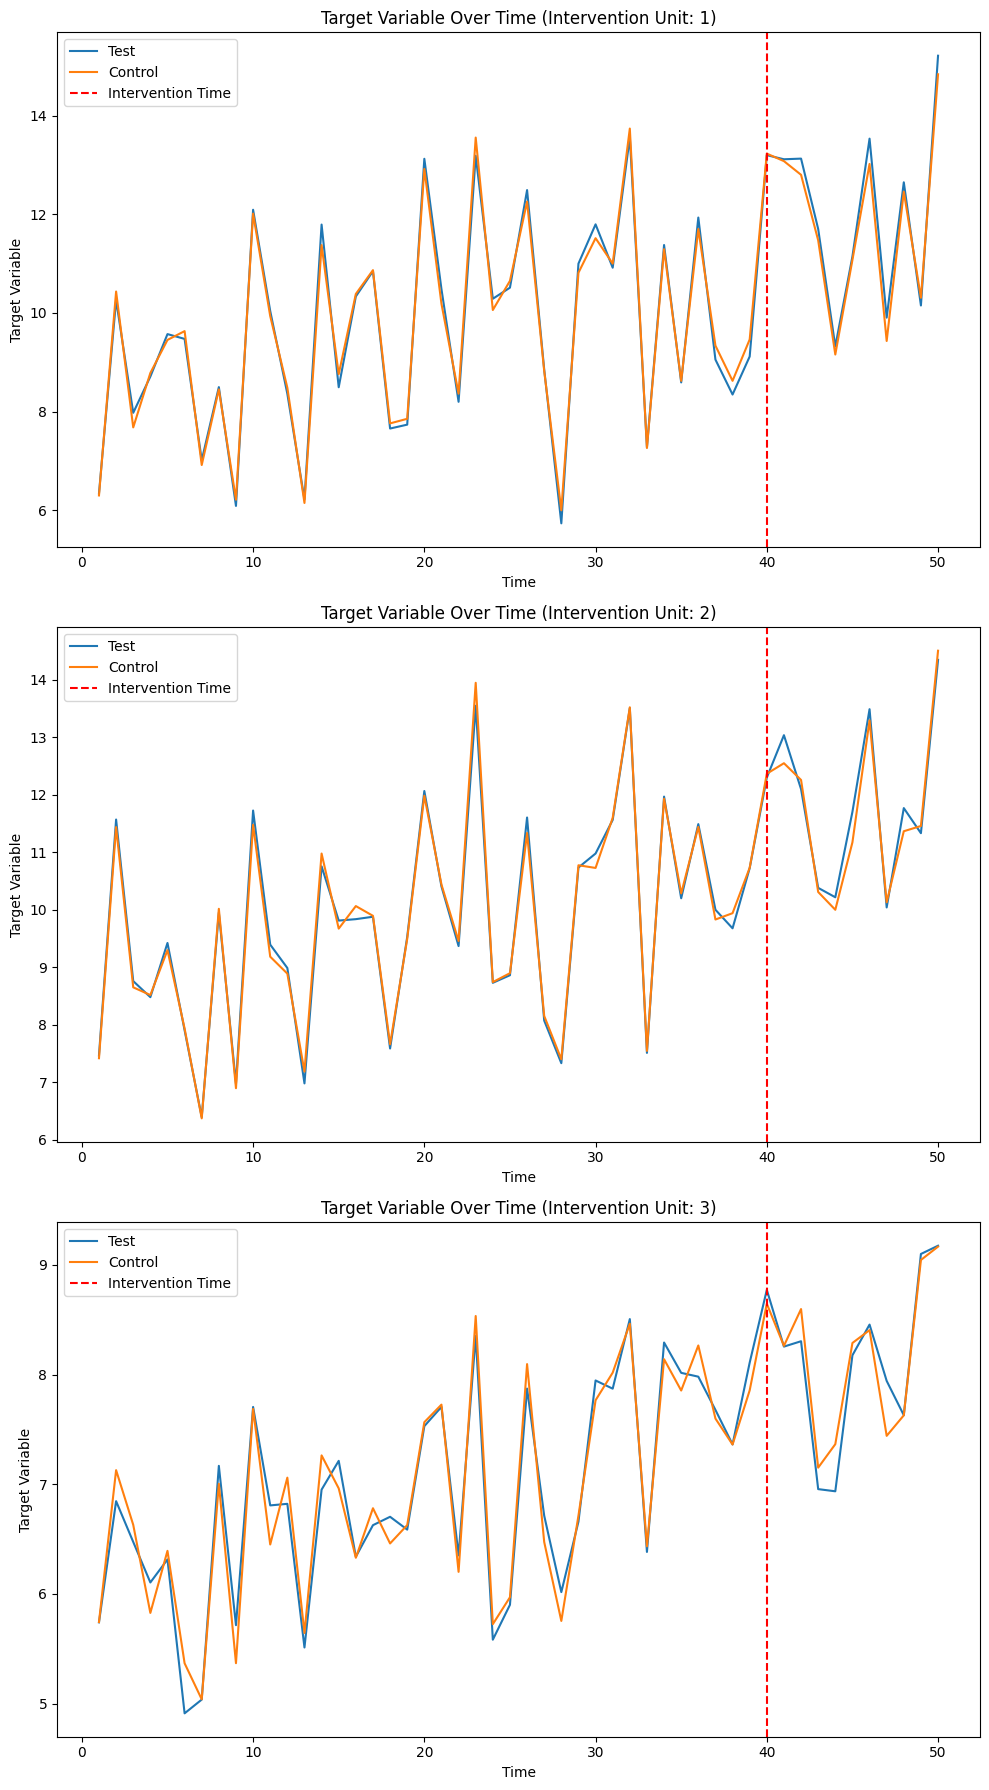

uplift: 1.0203, p value: 0.04166036194549111.
5it [00:06,  1.09s/it, uplift=1.0203]

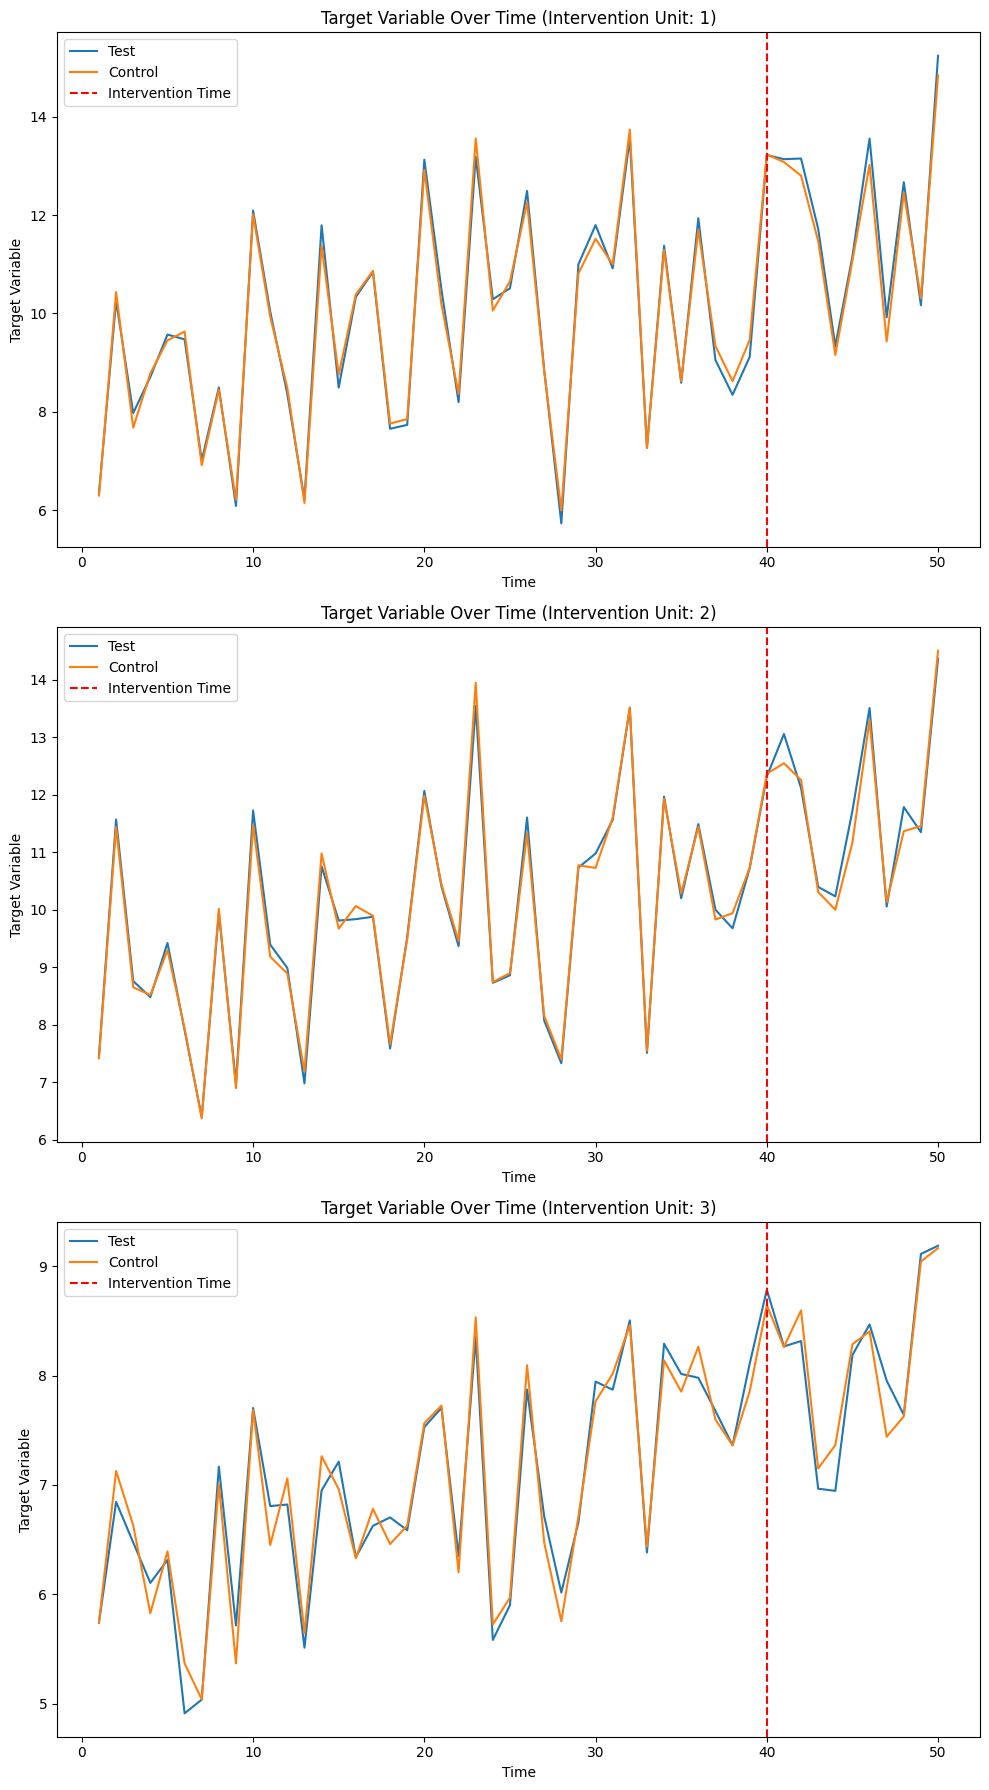

6it [00:07,  1.25s/it, uplift=1.0211]


1.02109375

In [6]:
sx.placebo_sensitivity_check(dataset, effects_placebo, r=1.05, write_progress=True)

uplift: 1.0250, p value: 0.2660406877005883.
1it [00:01,  1.05s/it, uplift=1.0250]

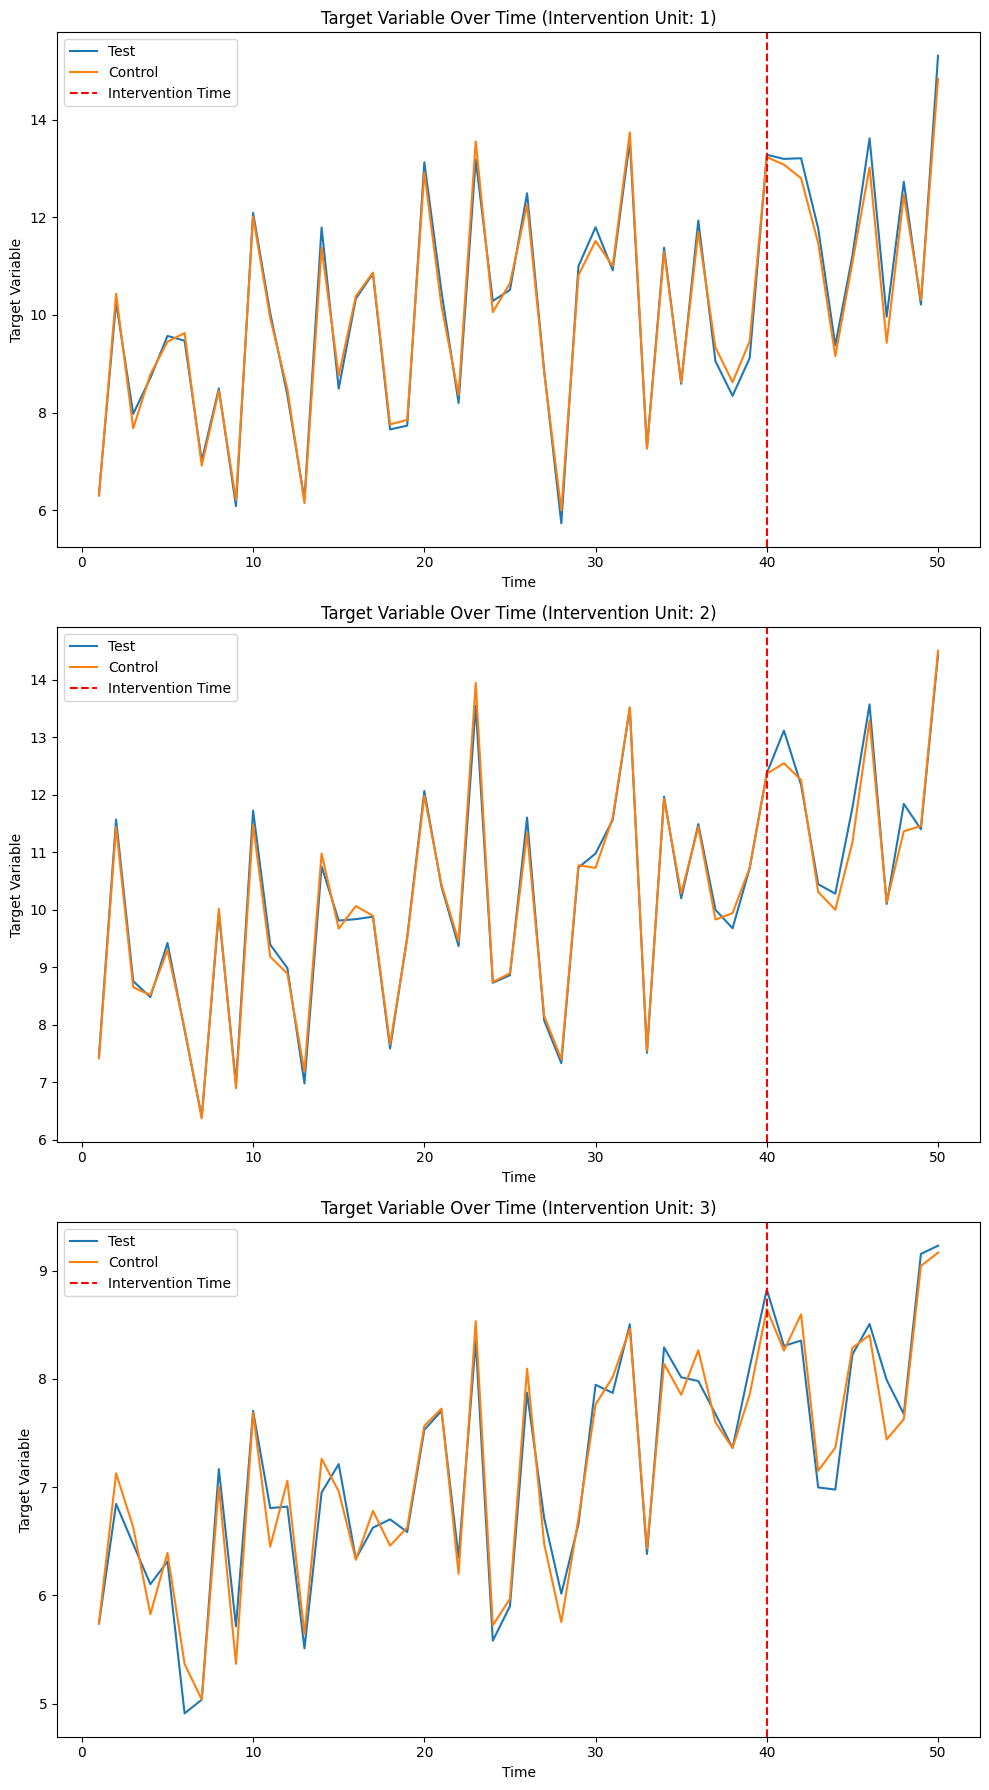

uplift: 1.0375, p value: 0.04418843910865356.
2it [00:02,  1.45it/s, uplift=1.0375]

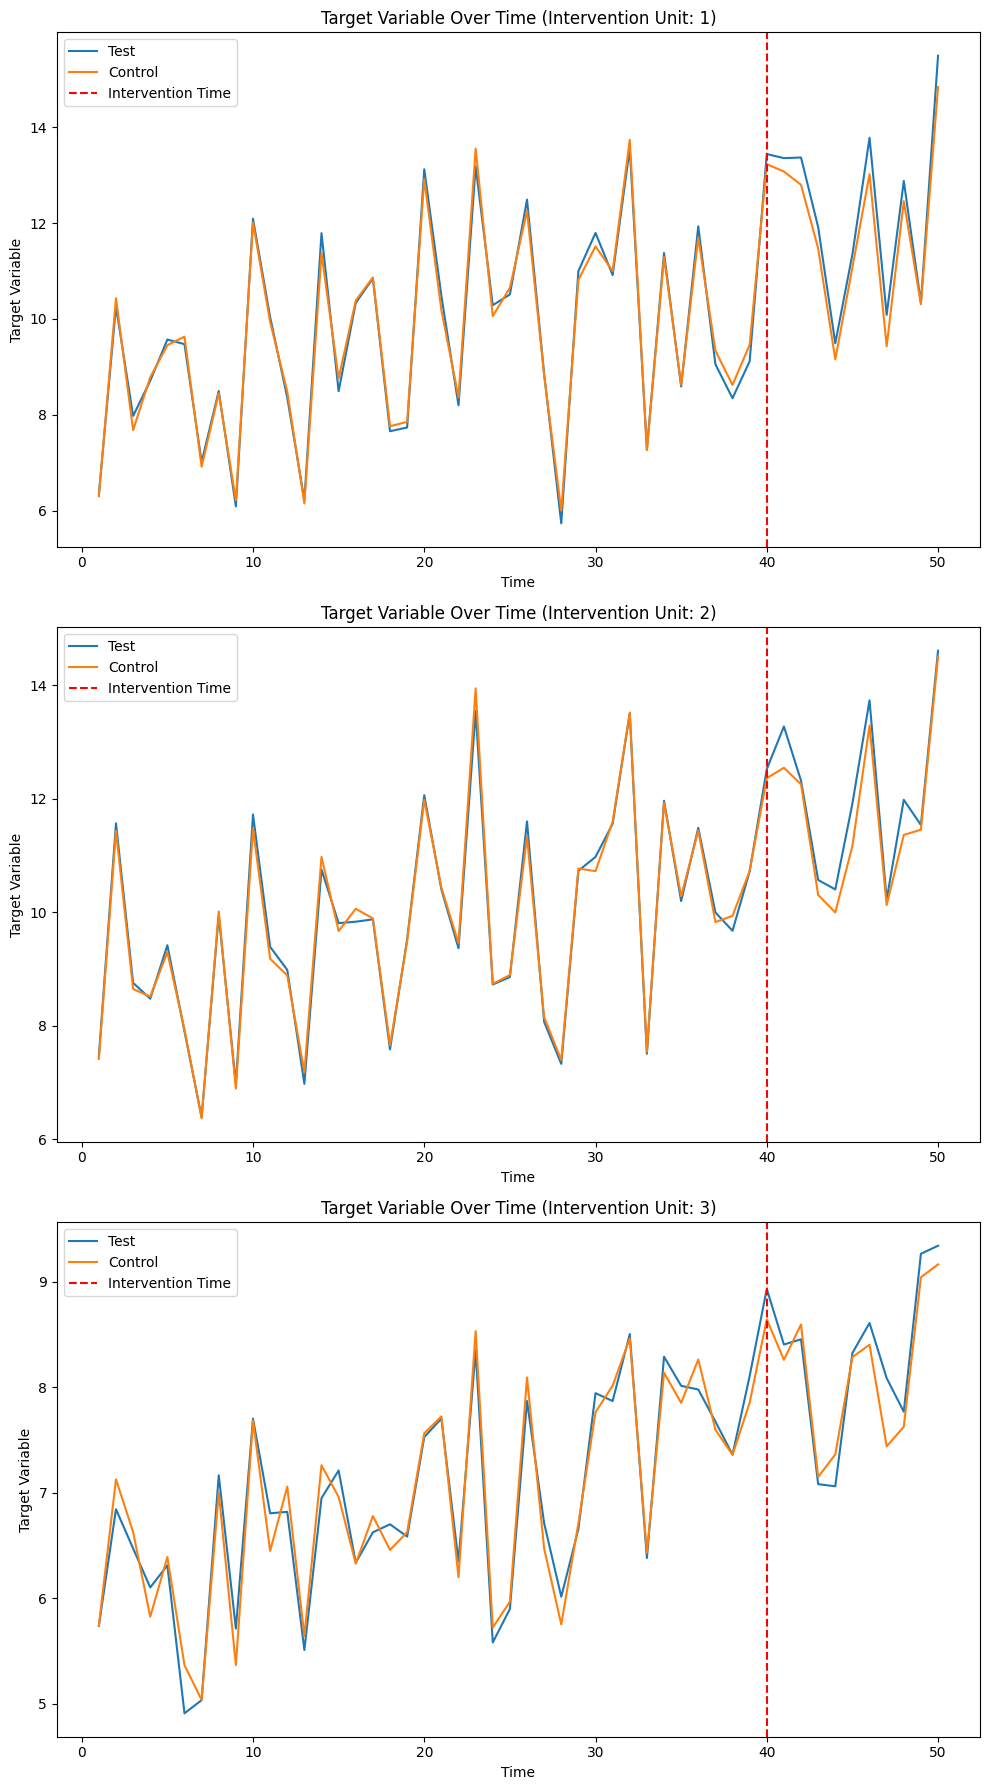

uplift: 1.0391, p value: 0.03392583922254488.
5it [00:06,  1.13s/it, uplift=1.0391]

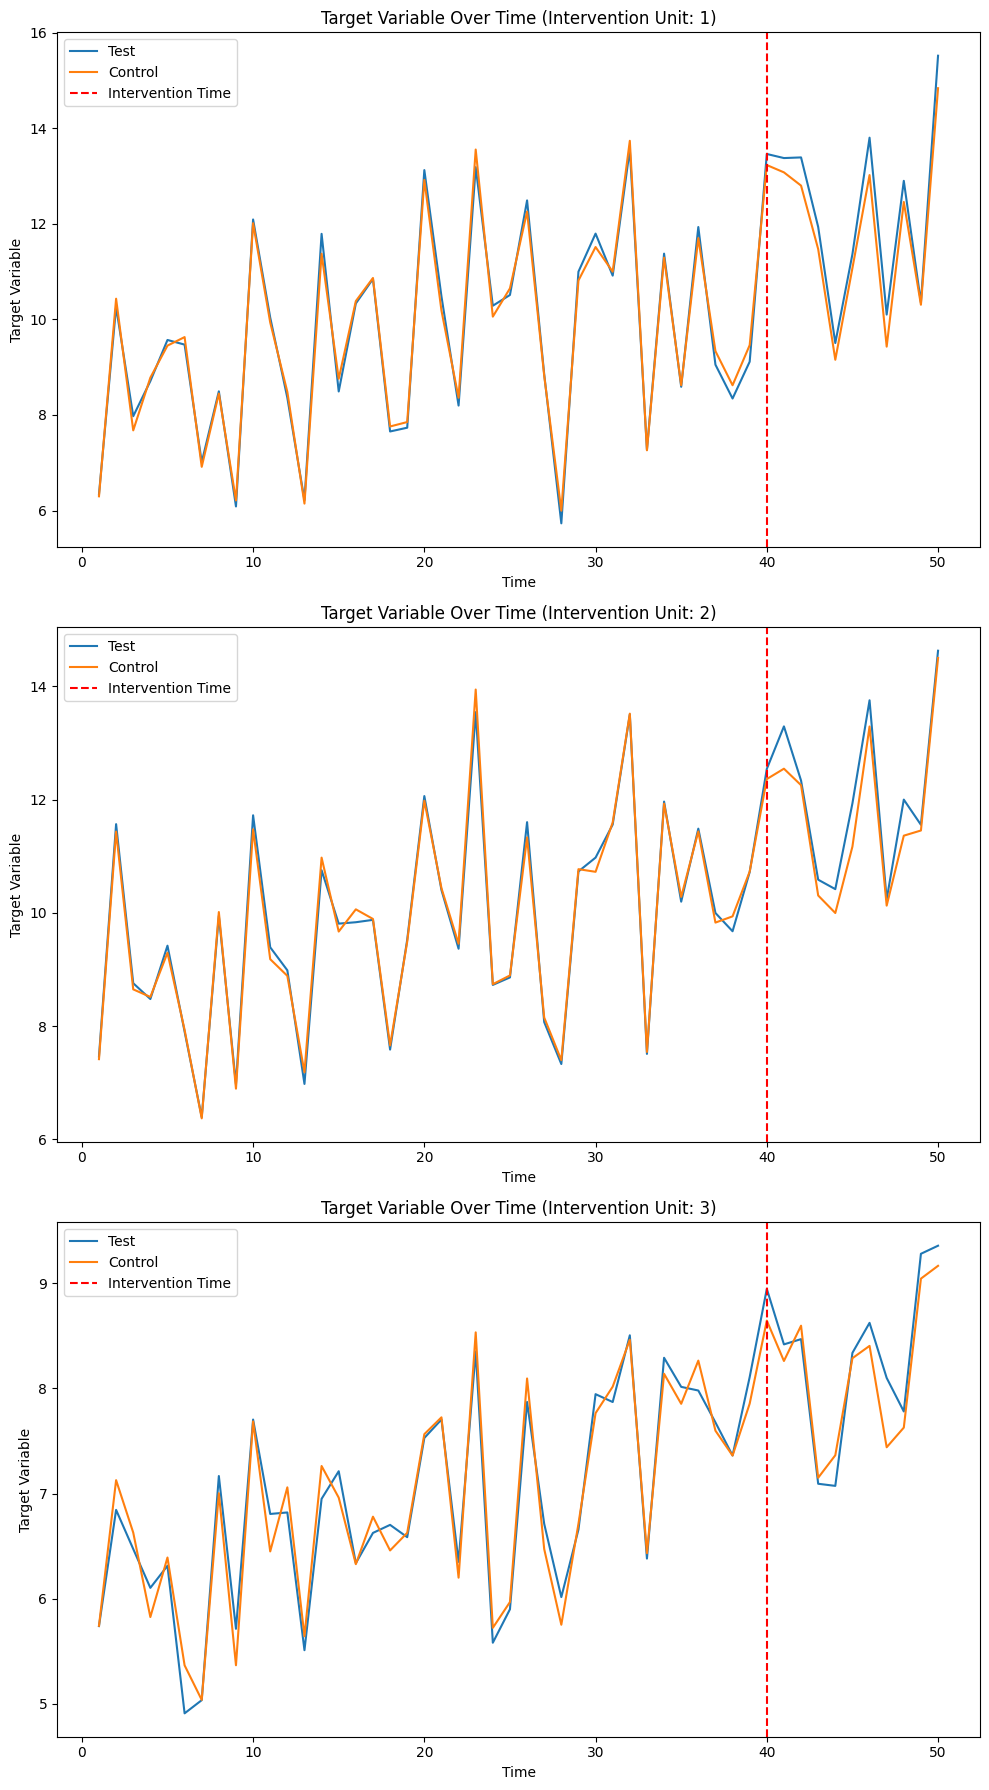

6it [00:08,  1.39s/it, uplift=1.0398]


1.0398437500000002

In [7]:
sx.ttest_sensitivity_check(dataset, r=1.05, write_progress=True)

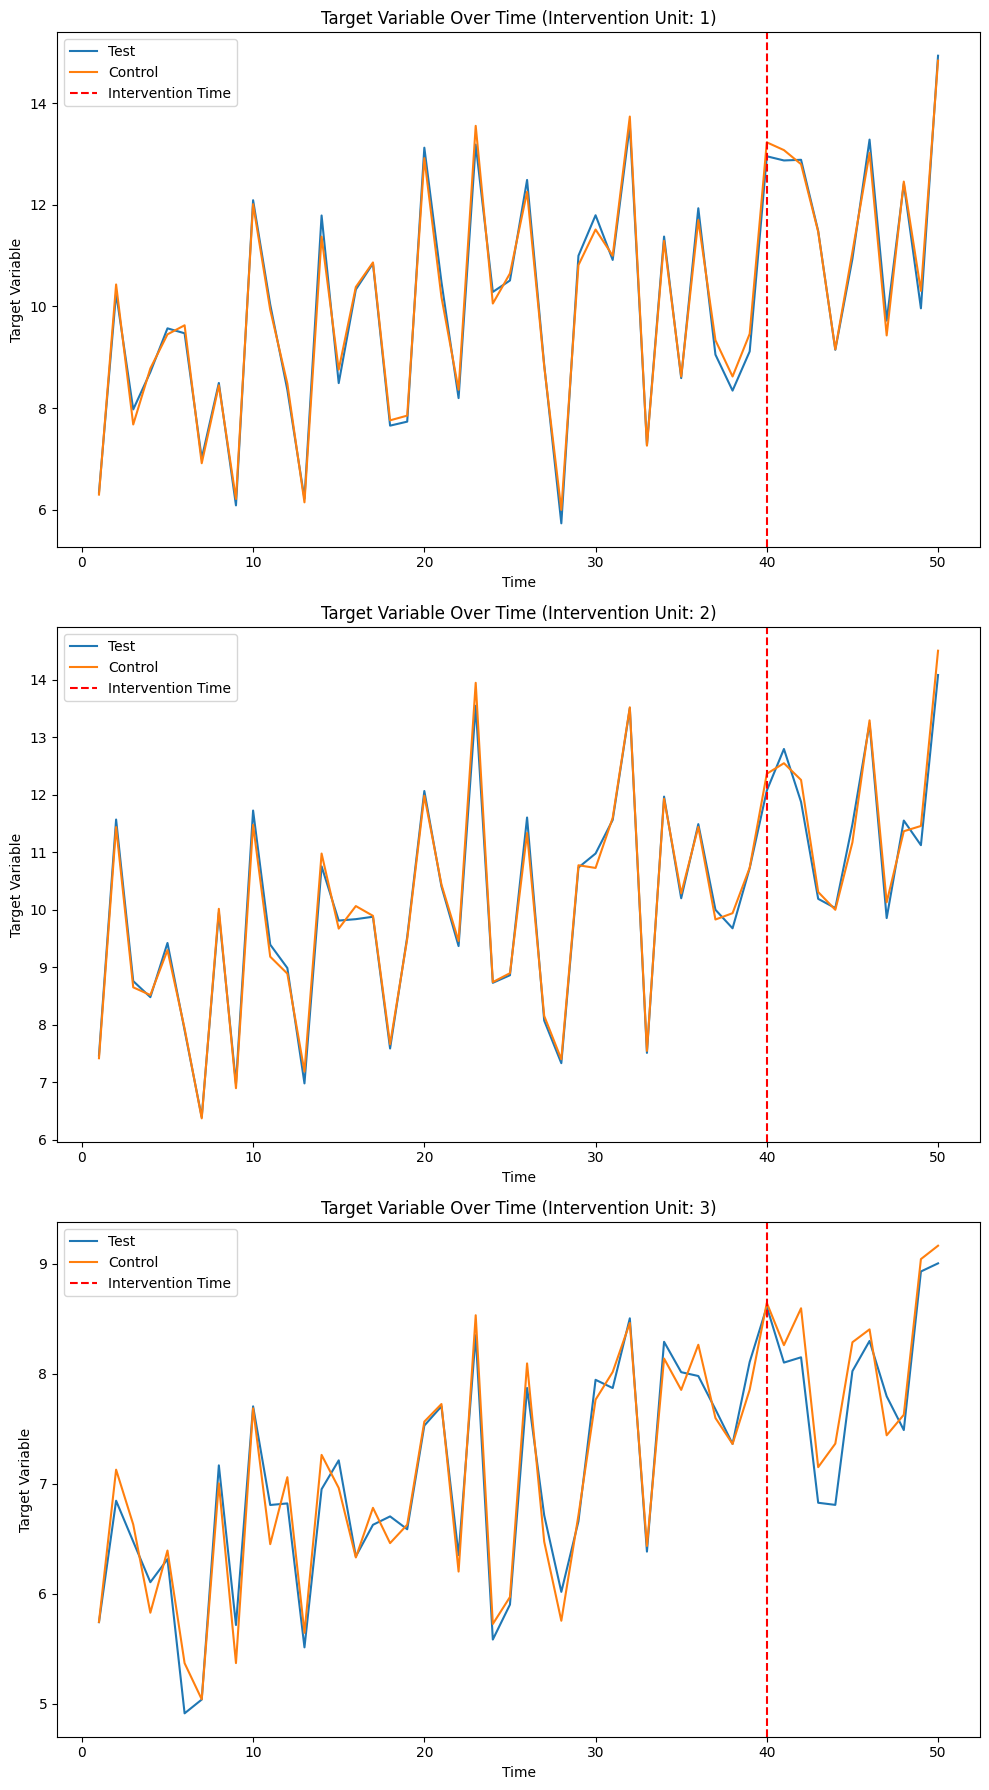

In [8]:
sc_test.plot()